In [1]:
#Imports
import numpy as np 
import cv2
import glob
import os
import matplotlib.pyplot as plt
#from mlxtend.plotting import plot_decision_regions
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

print(os.listdir("../input"))
dim = 100 # pixel dimension

['Test', 'Training']


In [2]:
# CONFIGURATION

# SET TO FALSE TO LOAD WEIGHTS,
# TRUE TO DO FITTING
do_fitting = True

In [3]:

"""
fruits: array of selected fruits
data_type: "Training" or "Test"
returns a tuple of numpy arrays:
(x, y, labels)
"""
def getFruits(fruits, data_type):
    images = []
    targets = []
    labels = []
    path = "../input/" + data_type + "/"
    
    for target, f in enumerate(fruits):
        p = path + f
        for image_path in glob.glob(os.path.join(p, "*.jpg")):
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.resize(image, (dim, dim))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            images.append(image)
            targets.append(target)
            labels.append(f)
    # convert return values to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    targets = np.array(targets)
    return images, targets, labels



In [4]:
# Selection of fruits
#fruits = ['Banana', 'Orange' , 'Kiwi', 'Apple Red Yellow 1', 'Cocos', 'Mango']
fruits = os.listdir("../input/Training/") # will load all the fruits :O
ds_store = ".DS_Store"
if ds_store in fruits: fruits.remove(ds_store) # you know fuck macOS

# Get Images and Labels
x_train, y_train, target_labels =  getFruits(fruits, 'Training')
x_test, y_test, _ = getFruits(fruits, 'Test')
print("Labels:", target_labels)

print('Train X Shape : ', x_train.shape)
print('Train Y Shape: ', y_train.shape)
print('Test X Shape : ', x_test.shape)
print('Test Y Shape: ', y_test.shape)

Labels: ['Apple Braeburn' 'Apple Braeburn' 'Apple Braeburn' ... 'Walnut' 'Walnut'
 'Walnut']
Train X Shape :  (48905, 100, 100, 3)
Train Y Shape:  (48905,)
Test X Shape :  (16421, 100, 100, 3)
Test Y Shape:  (16421,)


In [5]:
# Now, we have to divide the validation set into test and validation set
# TODO maybe do that
no_of_classes = len(np.unique(target_labels))
no_of_classes

95

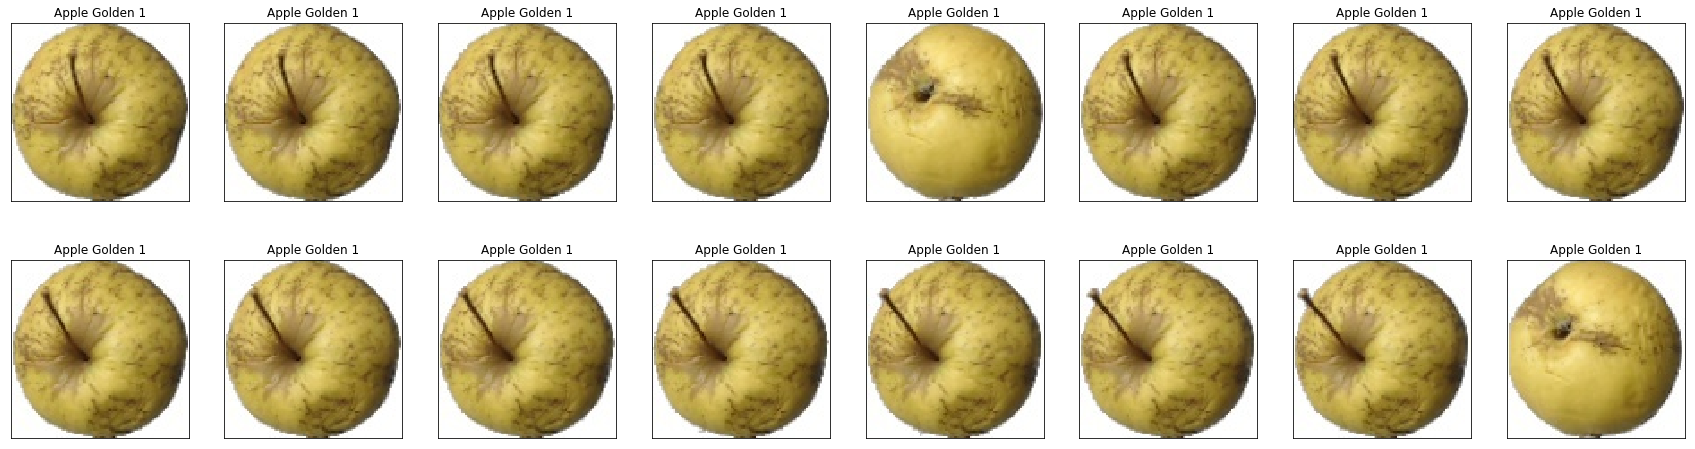

In [6]:
#Let's visualize the first 16 training images!
import matplotlib.pyplot as plt

offset = 800
fig = plt.figure(figsize =(30,8))
for i in range(16):
    ax = fig.add_subplot(2,8,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i+offset]))
    ax.set_title("{}".format(target_labels[i+offset]))

In [7]:
# Get the number of classes
no_of_classes = len(np.unique(y_train))
no_of_classes

95

In [8]:
# Get the number of classes
no_of_classes = len(np.unique(y_train))
# target labels are numbers corresponding to class label. 
# We need to change them to a vector of the elements.
from keras.utils import np_utils
print(y_train)
y_train = np_utils.to_categorical(y_train, no_of_classes)
y_test = np_utils.to_categorical(y_test, no_of_classes)

Using TensorFlow backend.


[ 0  0  0 ... 94 94 94]


In [9]:
print(y_train[0]) # Note that only one element has value 1 (corresponding to its label) and others are 0. (1, 0, ... 0)
print(y_train[-1]) # Should be (0, ... 0, 1)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
# should be (num of images, dim1, dim2, num of layers (BGR))
print('Training X shape : ', x_train.shape) 
# should be (num of images, num of classes)
print('Training Y shape : ', y_train.shape)
print('Test X shape : ', x_test.shape)
print('Test Y shape : ', y_test.shape)

print('1st training image shape ',x_train[0].shape)

Training X shape :  (48905, 100, 100, 3)
Training Y shape :  (48905, 95)
Test X shape :  (16421, 100, 100, 3)
Test Y shape :  (16421, 95)
1st training image shape  (100, 100, 3)


In [11]:
print('1st training image as array', x_train[0])

1st training image as array [[[254 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [12]:
# time to clamp all the pixel values between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [13]:
print('clamped 1st training image as array', x_train[0])

clamped 1st training image as array [[[0.99607843 1.         1.        ]
  [0.99607843 1.         1.        ]
  [0.99607843 1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.99607843 1.         1.        ]
  [0.99607843 1.         1.        ]
  [0.99607843 1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.99607843 1.         1.        ]
  [0.99607843 1.         1.        ]
  [0.99607843 1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
 

In [17]:
# from keras.models import Sequential
# from keras.layers import Conv2D,MaxPooling2D
# from keras.layers import Activation, Dense, Flatten, Dropout
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ModelCheckpoint
# from keras import backend as K

# model = Sequential()
# model.add(Conv2D(filters = 16, kernel_size = 3, input_shape = (100, 100, 3), padding = 'same'))
# model.add(Activation('relu'))
# # MaxPooling to reduce input space
# model.add(MaxPooling2D(pool_size = 2))

# model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same'))
# model.add(MaxPooling2D(pool_size = 2))

# model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'))
# model.add(MaxPooling2D(pool_size = 2))

# model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'))
# model.add(MaxPooling2D(pool_size = 2))

# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(Dense(150))
# model.add(Activation('relu'))
# model.add(Dropout(0.4))
# model.add(Dense(no_of_classes, activation = 'softmax'))


from keras import applications
from keras.models import Model 
from keras.layers import Dropout, Flatten, Dense

model_vgg19 = applications.VGG19(weights="imagenet", include_top=False, input_shape = (dim, dim, 3))

# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in model_vgg19.layers[:5]:
    layer.trainable = False

#Adding custom Layers 
model_new = model_vgg19.output
model_new = Flatten()(model_new)
model_new = Dense(1024, activation="relu")(model_new)
model_new = Dropout(0.5)(model_new)
model_new = Dense(1024, activation="relu")(model_new)
predictions = Dense(no_of_classes, activation="softmax")(model_new)

# creating the final model 
model = Model(input = model_vgg19.input, output = predictions)

model.summary()

W0825 12:55:13.744462 10752 deprecation.py:506] From C:\Users\andre\AppData\Local\conda\conda\envs\ML\lib\site-packages\keras\backend\tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

C:\Users\andre\AppData\Local\conda\conda\envs\ML\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


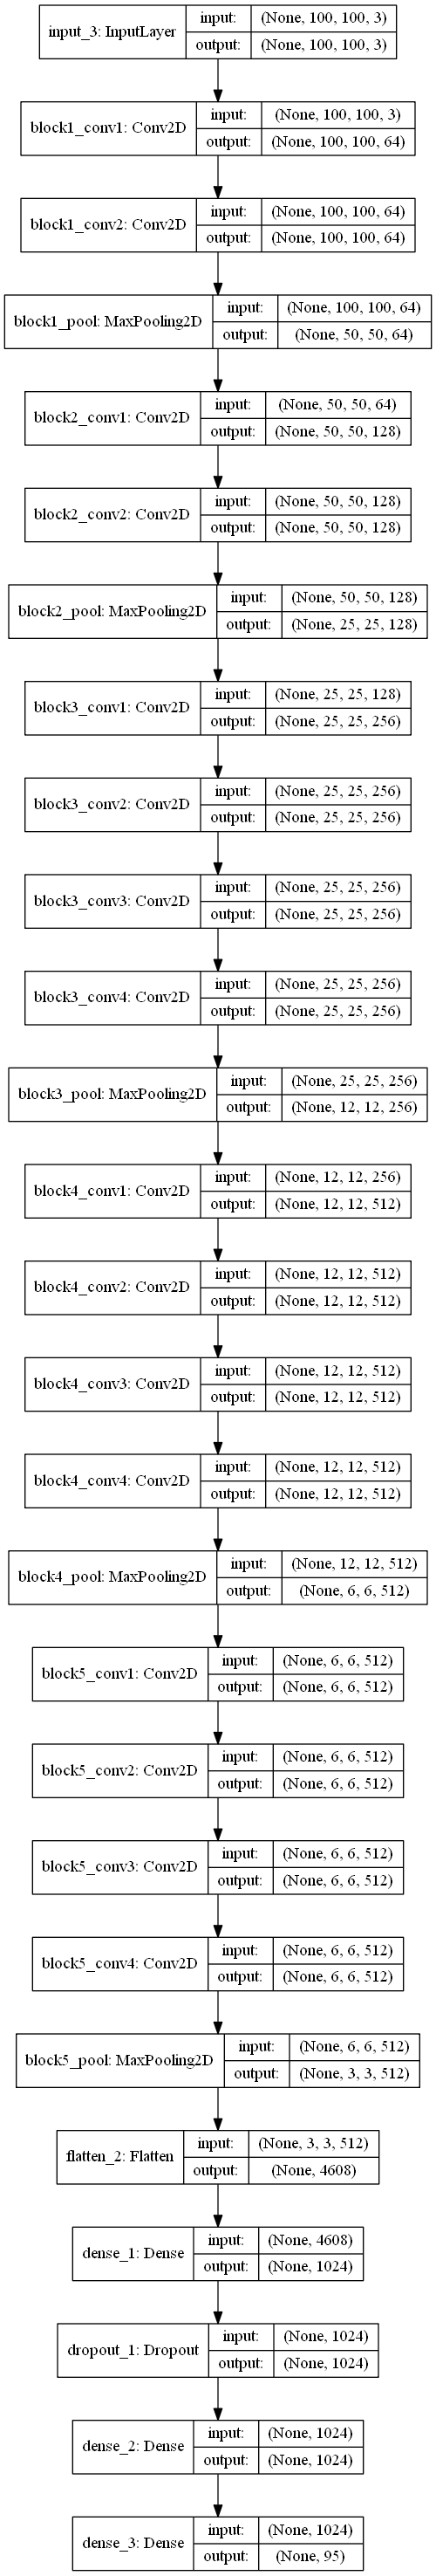

In [18]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [19]:
from keras.models import model_from_json

# model_saved = Test accuracy: 0.958406917970891
model_to_load = "model_saved"
if not do_fitting:
    # load json and create model
    json_file = open(model_to_load + '.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    # load weights into new model
    model.load_weights(model_to_load + ".h5")
    print("Loaded model", model_to_load, "from disk")

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

W0825 12:55:26.872021 10752 deprecation_wrapper.py:119] From C:\Users\andre\AppData\Local\conda\conda\envs\ML\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Compiled!


In [21]:
if do_fitting:
    history = model.fit(x_train, y_train)

W0825 12:55:30.065007 10752 deprecation.py:323] From C:\Users\andre\AppData\Local\conda\conda\envs\ML\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
 2496/48905 [>.............................] - ETA: 1:57:18 - loss: 15.7724 - acc: 0.0128

KeyboardInterrupt: 

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test accuracy:', score[1])

In [ ]:
import sklearn.metrics as metrics

y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)
y_true = np.argmax(y_test, axis=1)

confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred_labels)

In [ ]:
#with np.printoptions(threshold=np.inf):
#    print(confusion_matrix)
    
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=False, fmt="d", cmap="Blues")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

print_confusion_matrix(confusion_matrix, fruits, figsize = (25,20), fontsize=10)

In [ ]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} (truth = {})".format(fruits[pred_idx], fruits[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [ ]:
# Plot all the wrongly classifed fruits
num_wrong = 0
for idx, pred in enumerate(y_pred):
    pred_idx = np.argmax(pred)
    true_idx = np.argmax(y_test[idx])
    if pred_idx != true_idx: num_wrong += 1

fig = plt.figure(figsize=(30, 250))
i = 0
print(num_wrong, " wrong predictions (total", len(y_test) ,").")
print("accuracy: ", 1 - (num_wrong / len(y_test)))
for idx, pred in enumerate(y_pred):
    pred_idx = np.argmax(pred)
    true_idx = np.argmax(y_test[idx])
    if pred_idx == true_idx: continue
    ax = fig.add_subplot(num_wrong / 10 + 1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    ax.set_title("{} ({})".format(fruits[pred_idx], fruits[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    i+=1

In [ ]:
# serialize model to JSON
model_json = model.to_json()
perc_string = "{0:.2f}".format(score[1]*100)
with open("model_saved_" + perc_string + ".json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
print(score)
model.save_weights("model_saved_" + perc_string + ".h5")

In [ ]:
x_self, y_self, _ = getFruits(fruits, 'Selfmade')
print(x_self)
y_self_pred = model.predict(x_self)

fig = plt.figure(figsize=(30, 30))
i = 0
print(num_wrong, " wrong predictions (total", len(y_self) ,").")
print("accuracy: ", 1 - (num_wrong / len(y_self)))
for idx, pred in enumerate(y_self_pred):
    pred_idx = np.argmax(pred)
    true_idx = np.argmax(y_self[idx])
    if pred_idx == true_idx: continue
    ax = fig.add_subplot(num_wrong / 10 + 1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_self[idx]))
    ax.set_title("{} ({})".format(fruits[pred_idx], fruits[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    i+=1

In [ ]:
## CODE BELOW IS USED TO CONVERT MODEL TO MLMODEL 


# Load a Keras model
from keras.models import model_from_json
model_to_load = "model_saved"

# load json and create model
json_file = open(model_to_load + '.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights(model_to_load + ".h5")
print("Loaded model", model_to_load, "from disk")

# Convert it with default input and output names
import coremltools

input_shapes = {"conv2d_1":x_train[0].shape}

coreml_model = coremltools.converters.keras.convert(
    model=model,
    input_name_shape_dict=input_shapes,
    input_names = ['image'],
    image_input_names = ['image'],
    #image_input_names = ['input1'], # Input names to the Keras model (a subset of the input_names parameter) that can be treated as images by Core ML.
    class_labels = fruits,
    output_names = ['classLabelProbs'])


# Saving the Core ML model to a file.
coreml_model.save(model_to_load + '.mlmodel')